# 1. Khai báo thư viện

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# 2. Thu thập dữ liệu

In [2]:
data = pd.read_csv('./Dataset/heart_2022_cleaned.csv')
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


# 3. Đặt câu hỏi

## Câu 1:

Những thói quen xấu như hút thuốc (SmokerStatus),uống rượu (AlcoholDrinkers), hoặc sử dụng thuốc lá điện tử (ECigaretteUsage) ảnh hưởng đến nguy cơ đột quỵ (HadStroke) như thế nào? Liệu các yếu tố sức khỏe như chỉ số khối lượng cơ thể (BMI), số giờ ngủ trung bình (SleepHours), tình trạng tham gia hoạt động thể chất (PhysicalActivities), và yếu tổ tuổi tác (AgeCategory) có góp phần làm tăng nguy cơ đột quỵ không? 

## Lợi ích khi trả lời câu hỏi

- Đột quỵ là một trong những nguyên nhân hàng đầu gây tử vong và tàn tật trên toàn cầu. Theo một số nghiên cứu nó đến từ nhiều nguyên nhân như ảnh hưởng di căn từ một số căn bệnh mãn tính khác, hoặc qua một số thói quen xấu trong đời sống có thể hình thành và gây nên.
- Việc trả lời câu hỏi này sẽ giúp ta:
    - Tìm hiểu mối quan hệ giữa lối sống và nguy cơ đột quỵ giúp đưa ra các biện pháp phòng ngừa hiệu quả hơn.
    - Giúp đề xuất các khuyến nghị về lối sống lành mạnh, nâng cao nhận thức cộng đồng về cách giảm thiểu nguy cơ đột quỵ.

-----

## Phân tích hướng xử lý

### 1. Phạm vi dữ liệu

- Xét trên tất các đối tượng có trong tập dataset

### 2. Phân tích

- **Phân tích tỷ lệ đột quỵ dựa trên tuổi tác**
    - Tính tỉ lệ đột quỵ (`HadStoke`) của từng nhóm tuổi (`AgeCategory`) có trong dataset.
    - Trực quan hóa bằng biểu đồ cột.    
- **Phân tích tỷ lệ đột quỵ dựa trên các yếu tố sức khỏe**
    - Đối với `BMI`, tính tỷ lệ đột quỵ của 4 nhóm: Gầy (chỉ số BMI từ 0-18.5), Bình thường (chỉ số BMI từ 18.5-25), Thừa cân (chỉ số BMI từ 25-30) và Béo phì (chỉ số BMI từ 30-100). 
    - Đối với `SleepHours`, chia ra thành 3 nhóm: Ngủ ít (< 6h), Ngủ đủ giấc (6-8h) và Ngủ nhiều (> 8h). Tỉnh tỷ lệ đột quỵ của từng nhóm.
    - Đối với `PhysicalActivities`: tính tỷ lệ đột quỵ của 2 nhóm Người có hoạt động thể chất và Người không hoạt động thể chất.
    - Trực quan hóa bằng biểu đồ cột.  
- **Phân tích tỷ lệ đột quỵ dựa trên các thói quen xấu trong sinh hoạt**
    - Đối với `SmokerStatus`: tính tỷ lệ đột quỵ của 4 nhóm người Người chưa từng hút thuốc, Người đã từng hút thuốc, Người vẫn đang hút thuốc với tần xuất thỉnh thoảng và Người vẫn đang hút thuốc với tần xuất thường xuyên.
    - Đối với `ECigaretteUsage`: tính tỷ lệ đột quỵ của 4 nhóm người Người chưa từng sử dụng thuốc lá điện tử, Người hiện đang không sử dụng thuốc lá điện tử, Người sử dụng thuốc lá điện tử với tần xuất thỉnh thoảng và Người hút thuốc thuốc lá điện tự với tần xuất thường xuyên.
    - Đối với `AlcoholDrinkers`: tính tỷ lệ đột quỵ của 2 nhóm người Người có sử dụng đồ uống có cồn và Người không sử dụng đồ uống có cồn.
    - Trực quan hóa bằng biểu đồ cột.

### 3. Kỳ vọng

- Xác định được xu hướng độ quỵ của các nhóm tuổi
- Xác định được nguyên nhân gây ra tỷ lệ đột quỵ dựa trên các yếu tố sức khỏe và các thói quen xấu trong sinh hoạt. Đưa ra được nhận định đúng đắn cùng lời khuyên cho những tình trạng đang có tỷ lệ đột quỵ cao.

### Tiền xử lý

In [3]:
df = data[['HadStroke','PhysicalActivities','AgeCategory','BMI','SleepHours','SmokerStatus', 'AlcoholDrinkers', 'ECigaretteUsage']].copy()

#Sleep
sleep_bins = [0, 6, 8, 24]  # Giới hạn nhóm
sleep_labels = ['Short sleep (< 6h)', 'Normal sleep (6 - 8h)', 'Long sleep (> 8h)']  # Nhãn nhóm
df['Sleep_Group'] = pd.cut(df['SleepHours'], bins=sleep_bins, labels=sleep_labels, right=False)

#BMI
bmi_bins = [0, 18.5, 25, 30, 100]  # Giới hạn nhóm
bmi_labels = ['Underweight', 'Normalweight', 'Outweight', 'Obesity']  # Nhãn nhóm
df['BMI_Group'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)

label_mapping_smoker = {
    'Current smoker - now smokes every day': 'Smoker (daily)',
    'Current smoker - now smokes some days': 'Smoker (occasional)',
    'Former smoker': 'Ex-smoker',
    'Never smoked': 'Never smoked'
}

label_mapping_ecig = {
    'Never used e-cigarettes in my entire life': 'Never used',
    'Use them some days': 'Some days',
    'Use them every day':'Every day',
    'Not at all (right now)':'Not using'
}

# Áp dụng mapping để rút gọn nhãn cho SmokerStatus
df['SmokerStatus'] = df['SmokerStatus'].replace(label_mapping_smoker)
df['ECigaretteUsage'] = df['ECigaretteUsage'].replace(label_mapping_ecig)

### Phân tích 

#### Phân tích tỷ lệ đột quỵ theo các nhóm tuổi

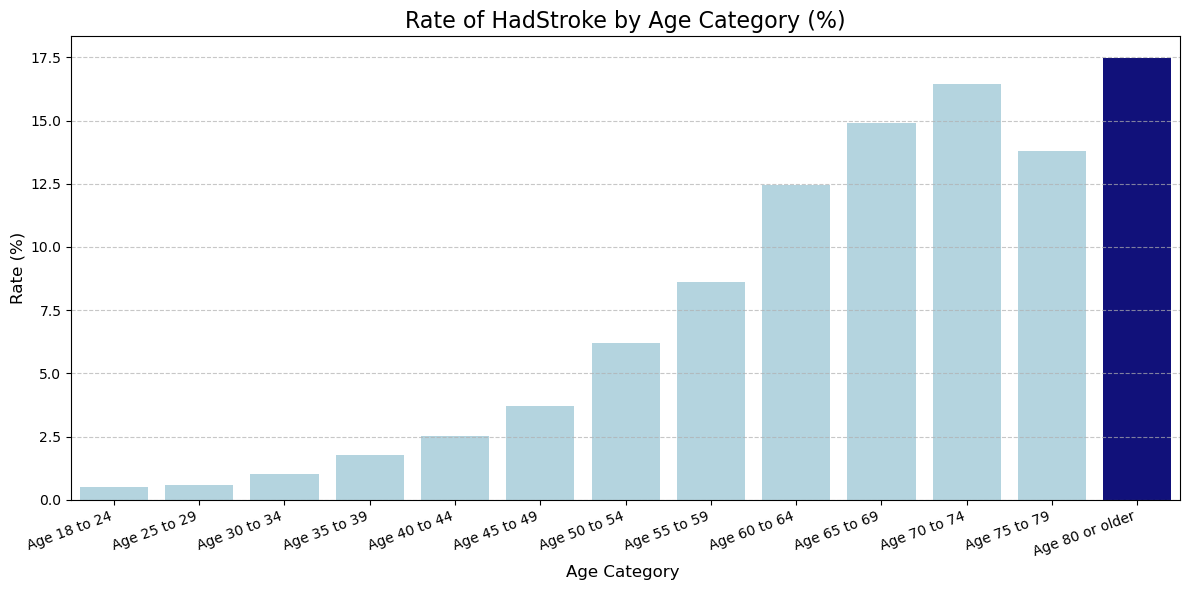

In [4]:
# Lọc dữ liệu liên quan đến đột quỵ và nhóm tuổi
stroke_by_age = df[df['HadStroke'] == 'Yes']['AgeCategory'].value_counts(normalize=True).sort_index()

# Tính tỷ lệ phần trăm cho từng nhóm tuổi
stroke_by_age_percentage = stroke_by_age * 100

max_index = stroke_by_age_percentage.idxmax()
colors = ['lightblue' if age != max_index else 'darkblue' for age in stroke_by_age_percentage.index]

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(x=stroke_by_age_percentage.index, y=stroke_by_age_percentage.values,
            hue=stroke_by_age_percentage.index,legend=False, palette=colors)
plt.xticks(rotation=20, ha='right')
plt.title('Rate of HadStroke by Age Category (%)', fontsize=16)
plt.xlabel('Age Category ', fontsize=12)
plt.ylabel('Rate (%)', fontsize=12)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

##### Nhận xét


Dựa vào biểu đồ ta nhận thấy:

- Tỉ lệ đột quỵ nhìn chung có xu hướng tăng dần đều theo các nhóm tuổi, tuy có xụt giảm ở nhóm 75-79 nhưng cũng không đáng kể.
- Tỉ lệ đột quỵ nhỏ nhất thuộc nhóm 18-24 tuổi với tỉ lệ 0.5% và tỉ lệ đột quỵ cao nhất thuộc nhóm 80 trở đi với tỉ lệ 17.5%. Điều này cho ta đa phần nhóm người cao tuổi già yếu thường là đối tượng dễ bị đột quỵ nhất.

Nhìn chung ta thấy tỉ lệ đột quỵ có mối quan hệ với nhóm tuổi. Khi tuổi của một người càng cao thì tỉ lệ đột quỵ càng cao.

#### Phân tích tỷ lệ đột quỵ theo các yếu tố sức khỏe

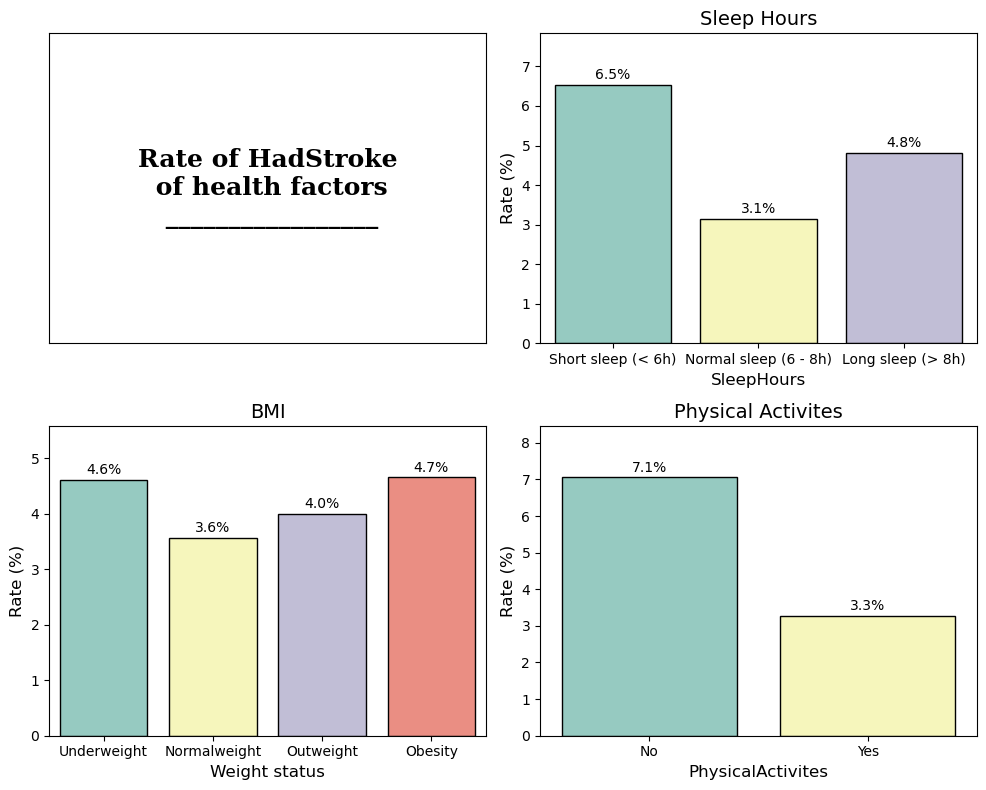

In [5]:
#2. Tính tỷ lệ đột quỵ
#Sleep
sleep_stroke_counts = df[df['HadStroke'] == 'Yes']['Sleep_Group'].value_counts()
sleep_total_counts = df['Sleep_Group'].value_counts()
sleep_stroke_percentage = (sleep_stroke_counts / sleep_total_counts * 100).sort_index()

#BMI
bmi_stroke_counts = df[df['HadStroke'] == 'Yes']['BMI_Group'].value_counts()
bmi_total_counts = df['BMI_Group'].value_counts()
bmi_stroke_percentage = (bmi_stroke_counts / bmi_total_counts * 100).sort_index()

#PhysicalActivities
pa_stroke_counts = df[df['HadStroke'] == 'Yes']['PhysicalActivities'].value_counts()
pa_total_counts = df['PhysicalActivities'].value_counts()
pa_stroke_percentage = (pa_stroke_counts / pa_total_counts * 100).sort_index()

#Trực quan hóa
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Subplot đầu tiên để tiêu đề
axes[0, 0].tick_params(left=False, bottom=False)
axes[0, 0].set_xticklabels([])
axes[0, 0].set_yticklabels([])
axes[0, 0].text(0.5, 0.5,
                'Rate of HadStroke\n of health factors\n _________________',
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=18, fontweight='bold',
                fontfamily='serif',
                color="#000000")

#Sleep
bar_plot = sns.barplot(x=sleep_stroke_percentage.index, y=sleep_stroke_percentage.values,ax=axes[0,1],
                   palette='Set3', hue=sleep_stroke_percentage.index,legend=False,edgecolor='black')
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt="%.1f%%", fontsize=10, padding=2)
axes[0,1].set_title('Sleep Hours',fontsize=14)
axes[0,1].set_xlabel('SleepHours',fontsize=12)
axes[0,1].set_ylabel('Rate (%)',fontsize=12)
axes[0,1].set_ylim(0, max(sleep_stroke_percentage.values) * 1.2)

#BMI
bar_plot = sns.barplot(x=bmi_stroke_percentage.index, y=bmi_stroke_percentage.values,ax=axes[1,0],
            palette='Set3', hue=bmi_stroke_percentage.index,legend=False,edgecolor='black')
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt="%.1f%%", fontsize=10, padding=2)
axes[1,0].set_title('BMI',fontsize=14)
axes[1,0].set_xlabel('Weight status',fontsize=12)
axes[1,0].set_ylabel('Rate (%)',fontsize=12)
axes[1,0].set_ylim(0, max(bmi_stroke_percentage.values) * 1.2)

#PhysicalActivities
bar_plot = sns.barplot(x=pa_stroke_percentage.index, y=pa_stroke_percentage.values,ax=axes[1,1],
            palette='Set3', hue=pa_stroke_percentage.index,legend=False,edgecolor='black')
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt="%.1f%%", fontsize=10, padding=2)
axes[1,1].set_title('Physical Activites',fontsize=14)
axes[1,1].set_xlabel('PhysicalActivites',fontsize=12)
axes[1,1].set_ylabel('Rate (%)',fontsize=12)
axes[1,1].set_ylim(0, max(pa_stroke_percentage.values) * 1.2)

plt.tight_layout()
plt.show()

##### Nhận xét


Dựa vào biểu đồ ta thấy:

- Đối với yếu tố thời gian ngủ:
    - Những người có thời gian ngủ ít (< 6h) có tỉ lệ đột quỵ cao nhất, đạt 6.5%.
    - Những người có thời gian ngủ nhiểu (> 8h) có tỉ lệ đột quỵ 4.8%.
    - Những người có thời gian ngủ đủ giấc (6 - 8h) thì tỉ lệ đột quỵ thấp nhất, chỉ 3.1%.     
- Đối với yếu tố chỉ số BMI:
    - Tỉ lệ đột quỵ của người béo phì và người gầy đạt lần lượt trên 4.7% và 4.6% lớn nhất trong các trạng thái cân nặng.
    - Những người thừa cân tỉ lệ đột quỵ đạt khoảng 4%.
    - Và thấp nhất là tỉ lệ đột quỵ của người bình thường với tỉ lệ khoảng 3.6%.
- Đối với yếu hoạt động thể chất:
    - Những người không hoạt động thể chất đạt mức tỉ lệ đột quỵ nhiều nhất với khoảng 7.1%, lớn gấp hơn 2 lần so với những người có hoạt động thể chất là 3.3%.

Điều này cho ta thấy đối với nhóm người ngủ đủ (6-8h), giữ trạng thái cân nặng ở mức bình thường và có những hoạt động thể chất thì tỉ lệ đột quỵ sẽ thấp hơn so với nhóm người còn lại. Vì vậy, yếu tố sức khỏe là rất quan trọng để tránh khỏi đột quỵ.

#### Phân tích tỷ lệ đột quỵ theo các thói quen xấu 

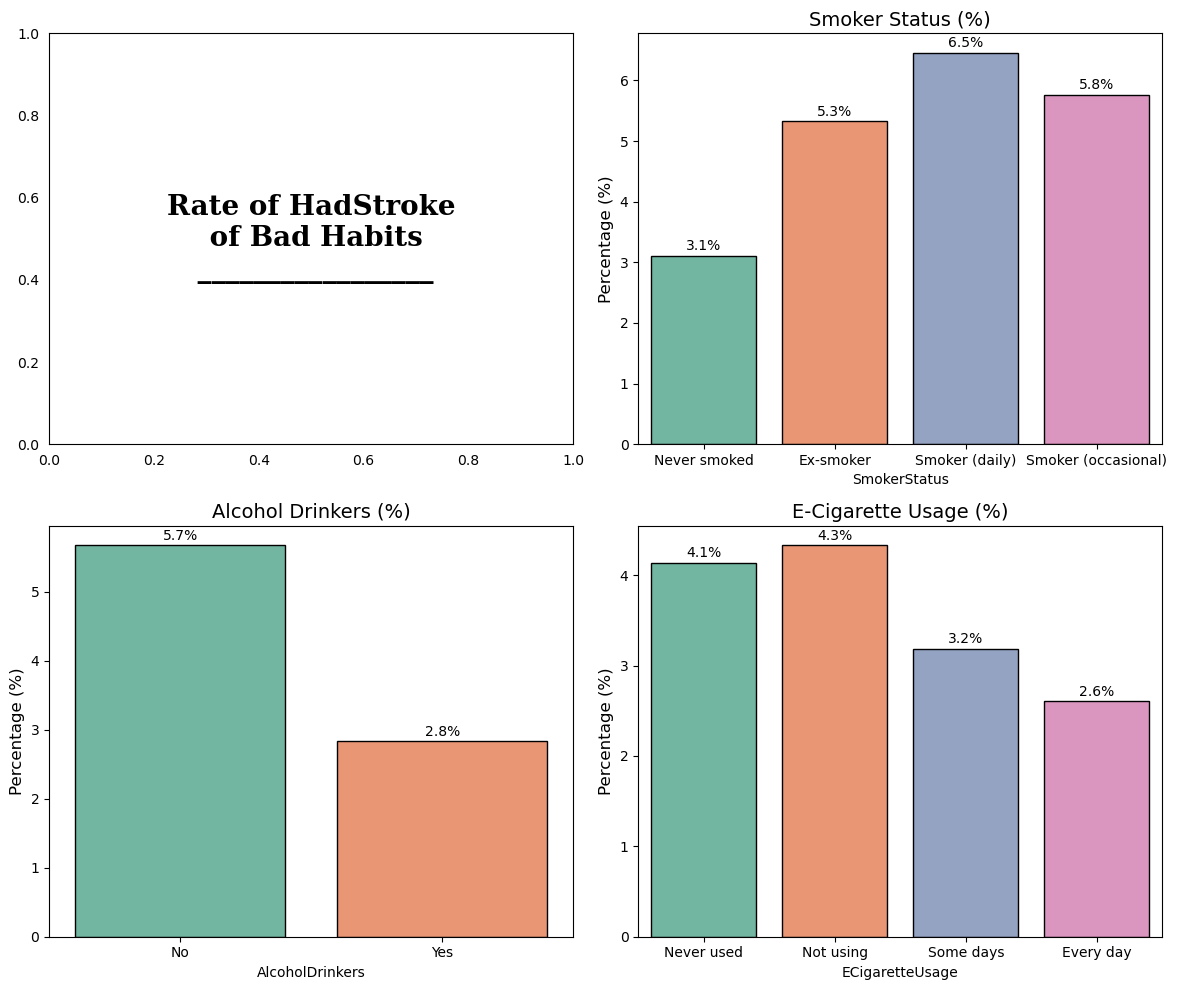

In [6]:
# Tính tỷ lệ đột quỵ theo từng thói quen xấu
habits = ['SmokerStatus', 'AlcoholDrinkers', 'ECigaretteUsage']
titles = [
    'Smoker Status (%)',
    'Alcohol Drinkers (%)',
    'E-Cigarette Usage (%)'
]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Subplot đầu tiên để tiêu đề
axes[0, 0].tick_params(left=False, bottom=False)
axes[0, 0].text(0.5, 0.5,
                'Rate of HadStroke\n of Bad Habits\n _________________',
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=20, fontweight='bold',
                fontfamily='serif',
                color="#000000")

# Các subplot còn lại để visualize từng thói quen xấu
for i, habit in enumerate(habits):
    row = (i + 1) // 2
    col = (i + 1) % 2

    # Tính tỷ lệ đột quỵ theo từng nhóm của thói quen
    habit_summary = df[df['HadStroke'] == 'Yes'][habit].value_counts()
    habit_total = df[habit].value_counts()
    habit_stroke_percentage = (habit_summary / habit_total) * 100
    
    bar_plot=sns.barplot(x=habit_stroke_percentage.index, y=habit_stroke_percentage.values,ax=axes[row,col],
            palette='Set2', hue=habit_stroke_percentage.index,legend=False,edgecolor='black')
    for container in bar_plot.containers:
        bar_plot.bar_label(container, fmt="%.1f%%", fontsize=10, padding=2)
    axes[row, col].set_ylabel('Percentage (%)', fontsize=12)
    axes[row, col].set_title(titles[i], fontsize=14)

# Căn chỉnh layout
plt.tight_layout()
plt.show()


##### Nhận xét

Dựa vào biểu đồ ta nhận thấy:

- Theo tình trạng hút thuốc:
    - Những người hút thuốc thường xuyên và thỉnh thoảng có tỉ lệ đột quỵ thấp nhất khi đạt lần lượt là 6.5% và 5.8%.
    - Những người đã từng hút thuốc có tỉ lệ đột quỵ là 5.3%.
    - Những người hút thuốc chưa bao giờ hút có tỉ lệ đột quỵ thấp nhất khi đạt 3.1%.
- Theo tình trạng uống rượu:
    - Những người không uống đồ uống có cồn có tỉ lệ đột quỵ cao nhất khi đạt 5.7%.
    - Những người có uống đồ có cồn có tỉ lệ đột quỵ thấp nhất khi đạt 2.8%.
- Theo tình trạng sử dụng thuốc lá điện tử:
    - Những người chưa bao giờ sử dụng và hiện tại không sử dụng có tỉ lệ cao nhất đạt lần lượt 4.1% và 4.3%.
    - Những người thỉnh thoảng hút thuốc và hút thuốc hằng ngày có tỉ lệ thấp nhất lần lượt là 3.2% và 2.6%.

Điều này cho ta thấy thói quen hút thuốc lá gây ra tỉ lệ đột quỵ cao hơn so với những người không hút. Trái với thói quen hút thuốc lá thì việc uống thức uống có cồn và thuốc lá điện tử không gây ra quá nhiều ảnh hưởng đến tỉ lệ đột quỵ. 

### Kết luận:

- Dựa vào những phân tích trên, ta nhận thấy các yếu tố như tuổi tác và sức khỏe (cân nặng, giấc ngủ và hoạt động thể chất) là một trong những yếu tố gây nên sự đột quỵ. Do đó, việc giữ gìn sức khỏe cho bản thân hiện tại và khi tuổi tác càng cao là một việc quan trọng để tránh gặp phải nguy cơ đột quỵ.
- Các thói quen xấu trong sinh hoạt như (rượu, thuốc lá và thuốc lá điện tử) có lẽ không phải là yếu tố chính gây nên bệnh đột quỵ (vì chỉ có việc hút thuốc nhiều gây tỷ lệ cao). Nhưng nó cũng là những yếu tố gây hại đến yếu tố sức khỏe, một trong những yếu tố dẫn đến đột quỵ. Vì vậy, cũng cần nên cân nhắc và điều chỉnh các thói quen này hợp lý để giảm được tỉ lệ đột quỵ nhiều nhất có thể.

## Câu 2

Dương tính với COVID-19 (CovidPos) ảnh hưởng như thế nào đến tỷ lệ mắc một số bệnh mãn tính như: bệnh phổi tắc nghẽn, rối loạn trầm cảm, hen suyễn (HadCOPD, HadDepressiveDisorder và HadAsthma) và các khó khăn trong đời sống hàng ngày như đi đứng, tập trung và lắng nghe (DifficultyWalking, DifficultyConcentrating và DeafOrHardOfHearing)?

## Lợi ích khi trả lời câu hỏi

- COVID-19 đã từng là một đại dịch đã gây ra nhiều thương vong cho nhiều người. Hiện nay, COVID-19 hiện không còn tồn tại trên thế giới. Tuy nhiên, có thể vẫn tồn tại lại nhiều hậu quả COVID-19 có thể liên quan tới những khó khăn trong sinh hoạt hay các di chứng của những căn bệnh mãn tính.
- Vì vậy, việc trả lời câu hỏi này sẽ:
    - Giúp hiểu liệu COVID-19 có liên quan đến việc gia tăng tỷ lệ mắc các bệnh mãn tính hoặc khó khăn đời sống hàng ngày hay không.
    - Đóng góp vào việc nghiên cứu các biến chứng hậu COVID-19.

## Hướng phân tích

### 1. Phạm vi

- Xét tất cả các đối tượng trong tập dữ liệu

### 2. Hướng phân tích

- **Chia tất cả các đối tượng thành 2 nhóm**
    - Nhóm dương tính với COVID-19
    - Nhóm âm tính với COVID-19
- **Phân tích tỷ lệ mắc bệnh giữa nhóm dương tính và âm tính với COVID-19**
    - Tính tỉ lệ mắc bệnh phổi tắc nghẽn mãn tính (`HadCOPD`), bệnh rối loạn trầm cảm (`HadDepressiveDisorder`) và bệnh hen suyễn (`HadAsthma`) của từng nhóm đối tượng.
    - Trực quan hóa bằng biểu đồ cột.
- **Phân tích tỷ lệ gặp phải những khó khăn trong đời sống của giữa nhóm dương tính và âm tính với COVID-19**
    - Tính tỉ lệ gặp phải những khó khăn như đi đứng, tập trung và lắng nghe (`DifficultyWalking`, `DifficultyConcentrating` và `DeafOrHardOfHearing`) của từng nhóm đối tượng.
    - Trực quan hóa bằng biểu đồ cột.

### 3. Kết quả kì vọng 

 - Xác định được những khó khăn trong đời sống và những căn bệnh có thể di chứng trên những đối tượng từng mắc phải COVID-19.

## Preprocessing

In [7]:
df = data[['CovidPos', 'HadCOPD', 'HadAsthma', 'HadDepressiveDisorder',
           'DifficultyWalking','DifficultyConcentrating','DeafOrHardOfHearing']].copy()
positive_df = df[df['CovidPos'] == 'Yes']
negative_df = df[df['CovidPos'] == 'No']

### Phân tích tỷ lệ mắc bệnh giữa nhóm dương tính và âm tính với COVID-19

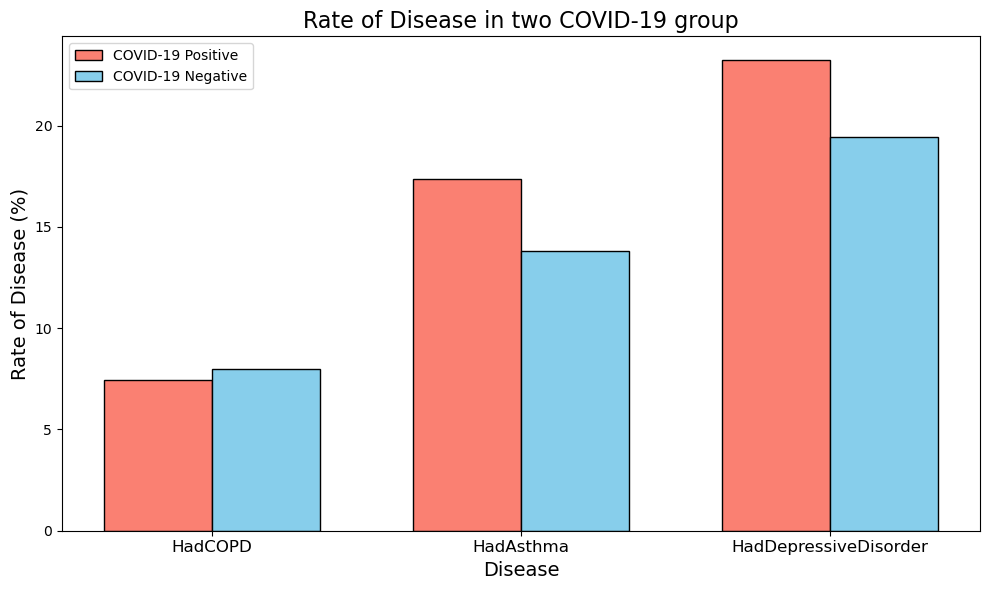

In [8]:
# Tính tỷ lệ mắc bệnh trong từng nhóm
diseases=['HadCOPD', 'HadAsthma', 'HadDepressiveDisorder']
disease_positive = positive_df[diseases].apply(lambda x: (x == 'Yes').mean() * 100)
disease_negative = negative_df[diseases].apply(lambda x: (x == 'Yes').mean() * 100)

# Chuẩn bị dữ liệu cho bar chart
bar_width = 0.35
indices = range(len(diseases))

# Vẽ bar chart
plt.figure(figsize=(10, 6))
plt.bar(indices, disease_positive, bar_width, label='COVID-19 Positive', color='salmon', edgecolor='black')
plt.bar([i + bar_width for i in indices], disease_negative, bar_width, label='COVID-19 Negative', color='skyblue', edgecolor='black')

# Gắn nhãn và chú thích
plt.xticks([i + bar_width / 2 for i in indices], diseases, fontsize=12)
plt.xlabel('Disease', fontsize=14)
plt.ylabel('Rate of Disease (%)', fontsize=14)
plt.title('Rate of Disease in two COVID-19 group', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

##### Nhận xét

Dựa vào biểu đồ ta nhận thấy:

- Nhóm người âm tính với COVID-19 có tỉ lệ mắc bệnh tắc nghẽn phổi mãn tính với khoảng 7.5% cao hơn nhóm người dương tính với COVID-19 với khoảng 7%.
- Ngược lại với 2 căn bệnh hen xuyễn và rối loạn trầm cảm, tỉ lệ mắc bệnh của nhóm người dương tính COVID-19 lần lượt là khoảng 23.5% và 17% cao hơn rõ rệt so với nhóm người âm tính với tỉ lệ lần lượt là khoảng 19% và 14%.

Điều này cho ta thấy đa phần người đã từng mắc phải COVID-19 sẽ dính phải căn bệnh rối loạn trầm cảm và hen xuyễn.

### Phân tích tỷ lệ gặp phải những khó khăn trong đời sống của giữa nhóm dương tính và âm tính với COVID-19

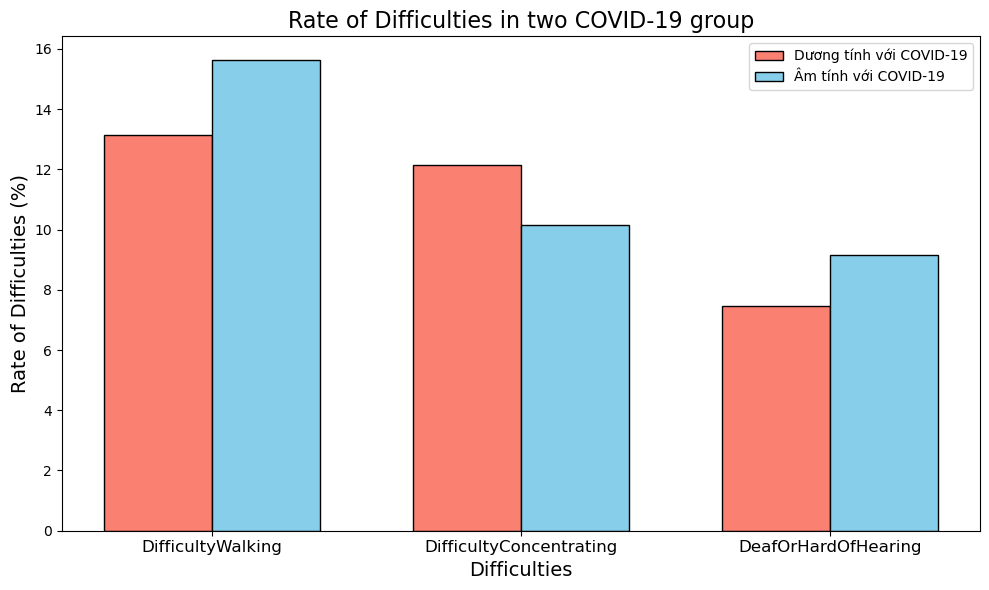

In [9]:
difficulties = ['DifficultyWalking', 'DifficultyConcentrating', 'DeafOrHardOfHearing']

# Tính tỷ lệ gặp khó khăn trong từng nhóm
difficulties_positive = positive_df[difficulties].apply(lambda x: (x == 'Yes').mean() * 100)
difficulties_negative = negative_df[difficulties].apply(lambda x: (x == 'Yes').mean() * 100)

# Chuẩn bị dữ liệu cho bar chart
bar_width = 0.35
indices = range(len(difficulties))

# Vẽ bar chart
plt.figure(figsize=(10, 6))
plt.bar(indices, difficulties_positive, bar_width, label='Dương tính với COVID-19', color='salmon', edgecolor='black')
plt.bar([i + bar_width for i in indices], difficulties_negative, bar_width, label='Âm tính với COVID-19', color='skyblue', edgecolor='black')

# Gắn nhãn và chú thích
plt.xticks([i + bar_width / 2 for i in indices], difficulties, fontsize=12)
plt.xlabel('Difficulties', fontsize=14)
plt.ylabel('Rate of Difficulties (%)', fontsize=14)
plt.title('Rate of Difficulties in two COVID-19 group', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

##### Nhận xét

Dựa vào biểu đồ ta nhận thấy:

- Những người dương tính với COVID-19 sẽ gặp nhiều khó khăn về tập trung hơn với tỉ lệ khoảng 12% so với những người âm tính với tỉ lệ khoảng 10%.
- Đối với khó khăn trong di chuyển và lắng nghe, thì tỉ lệ này cao hơn đối với người âm tính với COVID-19 với tỉ lệ lần lượt là khoảng 16% và 9.5%.

Điều này cho ta thấy những người dương tính với COVID-19 có xu hương khó khăn trong việc tập trung hơn so với người bình thường.

## Tóm lại

Đối với những người đã từng mắc COVID-19, họ thường có nguy cơ cao hơn bị các bệnh như hen suyễn hoặc rối loạn lo âu so với người không mắc. Ngoài ra, họ thường gặp khó khăn đáng kể trong khả năng tập trung, điều này có thể ảnh hưởng lớn đến cuộc sống hàng ngày. Điều này nhấn mạnh tầm quan trọng của việc cẩn trọng và chú ý hơn đến các biến chứng hậu COVID-19. Vì vậy, những người đã khỏi bệnh cần chăm sóc bản thân tốt hơn và tìm kiếm sự hỗ trợ y tế phù hợp để giảm thiểu các ảnh hưởng lâu dài.